In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ses
%matplotlib inline

In [72]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
import io
data=pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [0]:
data_temp=data.copy()

In [0]:
data=data_temp

In [135]:
data.head()

,key,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v46,v47,v48,v49,v50,v51,v52,v53,v54,label
0,447095,3452,111,22,433,214,3677,252,210,74,...,0,0,0,0,0,0,0,1,0,0
1,113427,3093,95,9,124,7,4115,234,227,124,...,0,0,0,0,0,0,0,0,0,1
2,66435,2551,61,17,90,5,726,231,202,98,...,0,0,0,0,0,0,0,0,0,1
3,8957,2944,135,3,430,13,1868,224,238,149,...,0,0,0,0,0,0,0,0,0,1
4,434631,3030,327,34,277,101,1973,120,181,190,...,0,1,0,0,0,0,0,0,0,1


In [144]:
data.loc[:5,'v1':'v10']

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,3452,111,22,433,214,3677,252,210,74,3316
1,3093,95,9,124,7,4115,234,227,124,2930
2,2551,61,17,90,5,726,231,202,98,751
3,2944,135,3,430,13,1868,224,238,149,1199
4,3030,327,34,277,101,1973,120,181,190,1693
5,2952,17,9,60,13,3596,213,222,145,1717


In [0]:
key=data['key']

In [0]:
data.drop('key',axis=1,inplace=True)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
y=data['label'].values

In [0]:
for i in range(len(data['v3'])):
  if data['v3'][i]>50:
    data['v3'][i]=50


In [0]:
for i in range(len(data['v4'])):
  if data['v4'][i]>1000:
    data['v4'][i]=1000
for i in range(len(data['v8'])):
  if data['v8'][i]<100:
    data['v8'][i]=100

In [0]:
for i in range(len(data['v7'])):
  if data['v7'][i]<80:
    data['v7'][i]=80

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


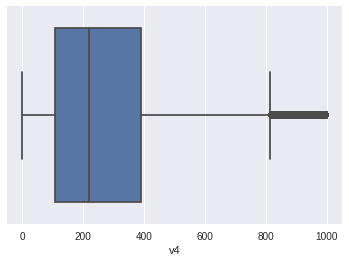

In [89]:
ses.boxplot('v4',data=data)

In [0]:
data.drop('label',axis=1,inplace=True)

In [0]:
X=data.values

In [92]:
X

array([[3452,  111,   22, ...,    0,    1,    0],
       [3093,   95,    9, ...,    0,    0,    0],
       [2551,   61,   17, ...,    0,    0,    0],
       ...,
       [3096,   85,   17, ...,    0,    0,    0],
       [2868,   93,   12, ...,    0,    0,    0],
       [2916,  299,   24, ...,    0,    0,    0]])

In [0]:
X=(X-np.mean(X))/np.std(X)

In [94]:
X[0]

array([ 5.22997576, -0.06941508, -0.21058413,  0.44133136,  0.09396033,
        5.5868638 ,  0.15423476,  0.08761566, -0.12810334,  5.01425677,
       -0.24547985, -0.24547985, -0.24389368, -0.24547985, -0.24547985,
       -0.24547985, -0.24547985, -0.24547985, -0.24547985, -0.24547985,
       -0.24547985, -0.24547985, -0.24547985, -0.24547985, -0.24547985,
       -0.24547985, -0.24547985, -0.24547985, -0.24547985, -0.24547985,
       -0.24547985, -0.24547985, -0.24547985, -0.24547985, -0.24547985,
       -0.24547985, -0.24547985, -0.24547985, -0.24547985, -0.24547985,
       -0.24547985, -0.24547985, -0.24547985, -0.24547985, -0.24547985,
       -0.24547985, -0.24547985, -0.24547985, -0.24547985, -0.24547985,
       -0.24547985, -0.24547985, -0.24389368, -0.24547985])

In [95]:
y.shape

(406709,)

In [96]:
X[0].shape

(54,)

In [0]:
model=Sequential()

In [0]:
model.add(Dense(1024,kernel_initializer='uniform',activation='relu',input_dim=54))

In [0]:
model.add(Dense(512,kernel_initializer='uniform',activation='relu'))
model.add(Dense(512,kernel_initializer='uniform',activation='relu'))
model.add(Dense(512,kernel_initializer='uniform',activation='relu'))

In [0]:
model.add(Dense(256,kernel_initializer='uniform',activation='relu'))
model.add(Dense(256,kernel_initializer='uniform',activation='relu'))

In [0]:
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))

In [0]:
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))

In [0]:
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              56320     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
__________

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.00)

In [108]:
X_train.shape

(406709, 54)

In [109]:
y_train.shape

(406709,)

In [111]:
model.fit(X_train,y_train,batch_size=500,epochs=50)

Epoch 1/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0536 - acc: 0.9787
Epoch 2/50
406709/406709 [==============================] - 12s 30us/step - loss: 0.0633 - acc: 0.9750
Epoch 3/50
252500/406709 [=================>............] - ETA: 4s - loss: 0.0469 - acc: 0.9806

406709/406709 [==============================] - 12s 30us/step - loss: 0.0469 - acc: 0.9805
Epoch 4/50
406709/406709 [==============================] - 12s 30us/step - loss: 0.0481 - acc: 0.9802
Epoch 5/50
366500/406709 [==========================>...] - ETA: 1s - loss: 0.0479 - acc: 0.9800

406709/406709 [==============================] - 12s 29us/step - loss: 0.0480 - acc: 0.9800
Epoch 6/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.1951 - acc: 0.9140
Epoch 7/50
399500/406709 [============================>.] - ETA: 0s - loss: 0.0810 - acc: 0.9671

406709/406709 [==============================] - 12s 30us/step - loss: 0.0805 - acc: 0.9672
Epoch 8/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0567 - acc: 0.9770
Epoch 9/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0553 - acc: 0.9771


Epoch 10/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0539 - acc: 0.9780
Epoch 11/50
406709/406709 [==============================] - 12s 30us/step - loss: 0.0508 - acc: 0.9790
Epoch 12/50
241000/406709 [================>.............] - ETA: 4s - loss: 0.0503 - acc: 0.9795

406709/406709 [==============================] - 12s 30us/step - loss: 0.0525 - acc: 0.9784
Epoch 13/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0521 - acc: 0.9787
Epoch 14/50
359500/406709 [=========================>....] - ETA: 1s - loss: 0.0479 - acc: 0.9800

406709/406709 [==============================] - 12s 29us/step - loss: 0.0489 - acc: 0.9796
Epoch 15/50
406709/406709 [==============================] - 12s 30us/step - loss: 0.0500 - acc: 0.9795
Epoch 16/50
390000/406709 [===========================>..] - ETA: 0s - loss: 0.0517 - acc: 0.9788

406709/406709 [==============================] - 12s 30us/step - loss: 0.0516 - acc: 0.9788
Epoch 17/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0539 - acc: 0.9784
Epoch 18/50
401500/406709 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9801

406709/406709 [==============================] - 12s 30us/step - loss: 0.0495 - acc: 0.9800
Epoch 19/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0851 - acc: 0.9689
Epoch 20/50
404000/406709 [============================>.] - ETA: 0s - loss: 0.0529 - acc: 0.9790

406709/406709 [==============================] - 12s 29us/step - loss: 0.0529 - acc: 0.9789
Epoch 21/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0496 - acc: 0.9799
Epoch 22/50
403500/406709 [============================>.] - ETA: 0s - loss: 0.0479 - acc: 0.9804

406709/406709 [==============================] - 12s 30us/step - loss: 0.0479 - acc: 0.9804
Epoch 23/50
406709/406709 [==============================] - 12s 30us/step - loss: 0.0471 - acc: 0.9808
Epoch 24/50
405500/406709 [============================>.] - ETA: 0s - loss: 0.0479 - acc: 0.9805

406709/406709 [==============================] - 12s 29us/step - loss: 0.0480 - acc: 0.9805
Epoch 25/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0455 - acc: 0.9812
Epoch 26/50
402000/406709 [============================>.] - ETA: 0s - loss: 0.0447 - acc: 0.9817

406709/406709 [==============================] - 12s 30us/step - loss: 0.0448 - acc: 0.9817
Epoch 27/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0549 - acc: 0.9780
Epoch 28/50
404000/406709 [============================>.] - ETA: 0s - loss: 0.0471 - acc: 0.9810

406709/406709 [==============================] - 12s 30us/step - loss: 0.0471 - acc: 0.9810
Epoch 29/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0662 - acc: 0.9739
Epoch 30/50
403500/406709 [============================>.] - ETA: 0s - loss: 0.0559 - acc: 0.9777

406709/406709 [==============================] - 12s 29us/step - loss: 0.0559 - acc: 0.9776
Epoch 31/50
406709/406709 [==============================] - 12s 30us/step - loss: 0.0440 - acc: 0.9821
Epoch 32/50
403000/406709 [============================>.] - ETA: 0s - loss: 0.0434 - acc: 0.9822

406709/406709 [==============================] - 12s 30us/step - loss: 0.0434 - acc: 0.9821
Epoch 33/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0431 - acc: 0.9821
Epoch 34/50
405000/406709 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9808

406709/406709 [==============================] - 12s 29us/step - loss: 0.0471 - acc: 0.9808
Epoch 35/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0433 - acc: 0.9820
Epoch 36/50
404500/406709 [============================>.] - ETA: 0s - loss: 0.0509 - acc: 0.9795

406709/406709 [==============================] - 12s 30us/step - loss: 0.0509 - acc: 0.9795
Epoch 37/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0435 - acc: 0.9822
Epoch 38/50
404500/406709 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9815

406709/406709 [==============================] - 12s 29us/step - loss: 0.0459 - acc: 0.9815
Epoch 39/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0743 - acc: 0.9711
Epoch 40/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0457 - acc: 0.9815


Epoch 41/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0516 - acc: 0.9798
Epoch 42/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0409 - acc: 0.9834
Epoch 43/50
243500/406709 [================>.............] - ETA: 4s - loss: 0.0429 - acc: 0.9824

406709/406709 [==============================] - 12s 29us/step - loss: 0.0425 - acc: 0.9826
Epoch 44/50
406709/406709 [==============================] - 12s 30us/step - loss: 0.0422 - acc: 0.9828
Epoch 45/50
358500/406709 [=========================>....] - ETA: 1s - loss: 0.0437 - acc: 0.9822

406709/406709 [==============================] - 12s 29us/step - loss: 0.0435 - acc: 0.9823
Epoch 46/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0684 - acc: 0.9746
Epoch 47/50
386500/406709 [===========================>..] - ETA: 0s - loss: 0.0426 - acc: 0.9829

406709/406709 [==============================] - 12s 29us/step - loss: 0.0430 - acc: 0.9828
Epoch 48/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.0450 - acc: 0.9821
Epoch 49/50
399000/406709 [============================>.] - ETA: 0s - loss: 0.1658 - acc: 0.9381

406709/406709 [==============================] - 12s 29us/step - loss: 0.1636 - acc: 0.9388
Epoch 50/50
406709/406709 [==============================] - 12s 29us/step - loss: 0.2101 - acc: 0.9133


In [34]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
import io
test=pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [113]:
test_copy.head()

,key,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54
0,258918,2352,293,23,256,45,201,151,228,215,...,0,0,0,0,0,0,0,0,0,0
1,258134,2790,88,8,330,35,1400,232,227,128,...,0,0,0,0,0,0,0,0,0,0
2,165265,2826,115,7,162,24,1020,232,233,134,...,0,0,0,0,0,0,0,0,0,0
3,522141,3234,137,16,150,20,968,243,232,112,...,0,0,0,0,0,0,0,0,0,0
4,569662,2810,58,22,124,25,3293,230,188,80,...,0,0,0,0,0,0,0,0,0,0


In [0]:
test=test_copy

In [115]:
test.shape

(174303, 55)

In [0]:
test_copy=test.copy()


In [0]:
for i in range(len(test['v3'])):
  if test['v3'][i]>30:
    test['v3'][i]=30
for i in range(len(test['v4'])):
  if test['v4'][i]>800:
    test['v4'][i]=800
for i in range(len(test['v8'])):
  if test['v8'][i]<180:
    test['v8'][i]=180
for i in range(len(test['v7'])):
  if test['v7'][i]<140:
    test['v7'][i]=140

In [0]:
key=test['key']
test.drop('key',axis=1,inplace=True)

In [0]:
test=test.values

In [0]:
test=(test-np.mean(test))/np.std(test)

In [121]:
test.shape

(174303, 54)

In [0]:
predict=model.predict_proba(test)

In [123]:
predict

array([[0.99880505],
       [0.99917454],
       [0.92186403],
       ...,
       [0.05205278],
       [0.8118173 ],
       [0.        ]], dtype=float32)

In [0]:
df1=pd.DataFrame(key,columns=['key'])

In [0]:
df2=pd.DataFrame(predict,columns=['score'])

In [126]:
predict

array([[0.99880505],
       [0.99917454],
       [0.92186403],
       ...,
       [0.05205278],
       [0.8118173 ],
       [0.        ]], dtype=float32)

In [0]:
output=pd.concat([df1,df2],axis=1)

In [128]:
output.head()

,key,score
0,258918,0.998805
1,258134,0.999175
2,165265,0.921864
3,522141,0.999944
4,569662,1.000000


In [129]:
output.tail()

,key,score
174298,235526,0.010147
174299,458737,0.000000
174300,409853,0.052053
174301,77486,0.811817
174302,180674,0.000000


In [0]:
output.to_csv('output1.csv',index=False)

In [0]:
from google.colab import files
files.download('output1.csv') 